In [1]:
#EDA - ANBERD and GDP data

In [ ]:
# The following dataset conducts an exploratory data analysis of the ANBERD dataset and GDP data to determine the relationship 
# between R&D expenditure and economic growth. Upon studying the trends of R&D expenditure per industry the top four 
# countries, China, US, Japan, and Germany, with the highest expenditure were selected for further analysis.
#Japan was the only country among the four not having a close to linear increase of R&D expenditure between 2012 and 2020. 
# All four countries invest in similar industries and have a lot of industry outliers for whitch the invest more.
#Japan was the only country for wich a correlation between R&D expenditure and GDP was not as singificant. 

In [ ]:
#The data in its current form already allows me to answer mmy research question and no additional data is missing. 

In [ ]:
#loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [2]:
#loading GDP dataset from worldbank
dfGDP = pd.read_csv('GDP_USGEJaCh.csv', skiprows = 4)
dfGDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,China,CHN,Unemployment with basic education (% of total ...,SL.UEM.BASC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,China,CHN,"Unemployment with advanced education, male (% ...",SL.UEM.ADVN.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,China,CHN,"Unemployment, youth male (% of male labor forc...",SL.UEM.1524.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.125500e+01,1.142700e+01,1.157900e+01,1.140900e+01,1.124100e+01,1.087600e+01,1.152000e+01,1.281500e+01,1.204500e+01,NaN
3,China,CHN,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.858342e+08,7.891342e+08,7.923132e+08,7.942356e+08,7.946242e+08,7.944806e+08,7.955729e+08,7.894802e+08,7.913826e+08,NaN
4,China,CHN,"Part time employment, female (% of total femal...",SL.TLF.PART.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#cleaning - selecting columns, renaming, droping rows, columns to rows

In [4]:
dfGDP3 = dfGDP[dfGDP["Indicator Name"].str.contains("current international")]

In [5]:
dfGDP4 = dfGDP3[dfGDP3["Indicator Name"].str.contains("GDP per capita")]

In [6]:
dfGDP5 = dfGDP4[["Country Name", "Country Code", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]

In [7]:
dfGDP6 = dfGDP5.melt(id_vars=["Country Name", "Country Code"], 
        var_name="Time", 
        value_name="GDP")

In [8]:
dfGDP6 = dfGDP6.rename(columns={"Country Name": "Country"})

In [9]:
dfGDP6.head()

,Country,Country Code,Time,GDP
0,China,CHN,2012,11168.697298
1,Germany,DEU,2012,43359.614827
2,Japan,JPN,2012,37605.974261
3,United States,USA,2012,51784.418574
4,China,CHN,2013,11872.497381


In [10]:
#line plot of GDP per country betweeen 2012 and 2020

In [11]:
def gdptrend(country:str, group:str, columnlist:list, sumby:str):
    df = dfGDP6[(dfGDP6.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)
    

China
Germany
Japan
United States


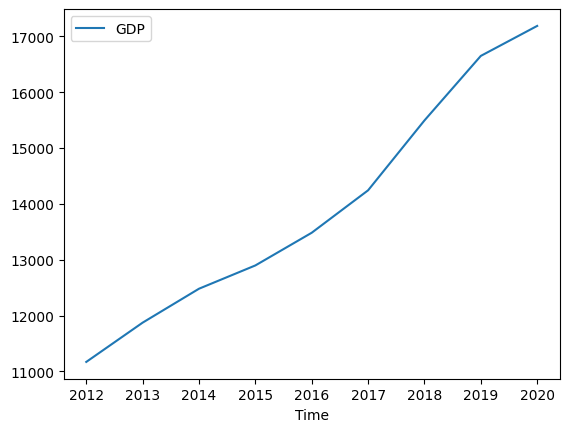

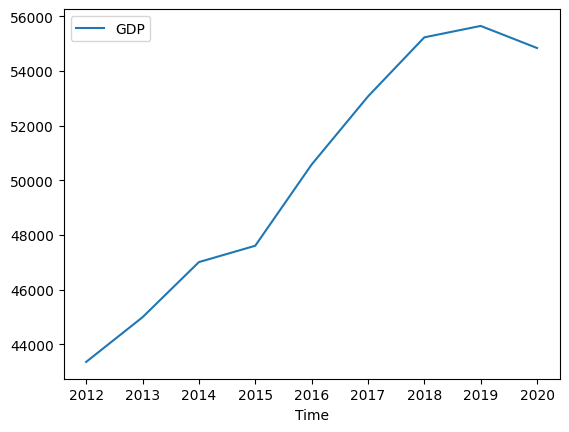

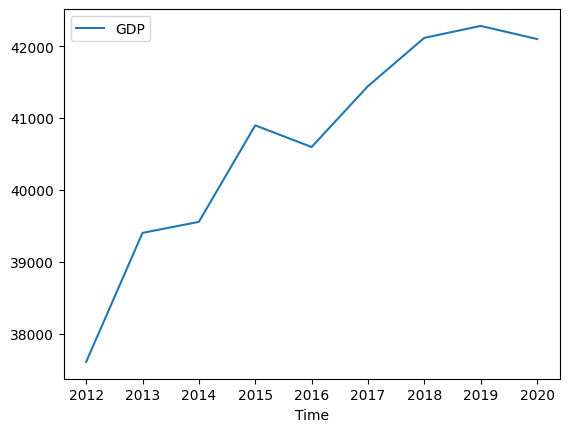

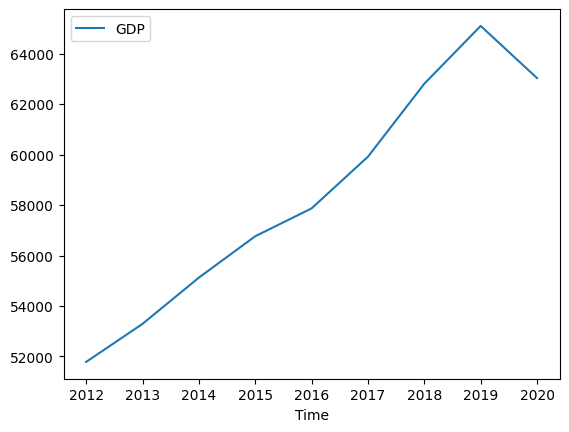

In [12]:
#gdptrend(country="Germany", group="Time", columnlist=["Time","GDP"], sumby="GDP")
for i in dfGDP6.Country.unique():
    gdptrend(country=i, group="Time", columnlist=["Time","GDP"], sumby="GDP")
    print(i)

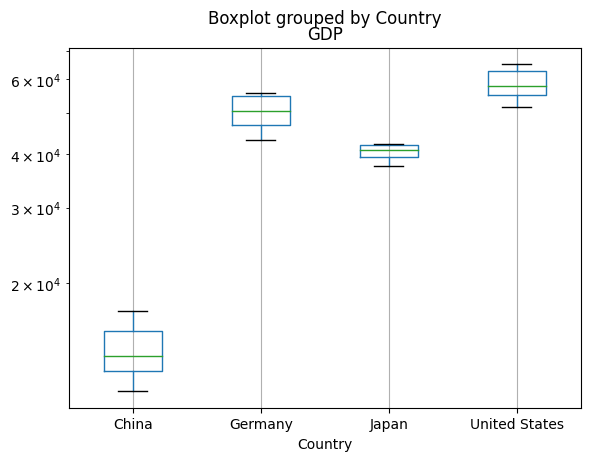

In [13]:
#boxplot of GDP per country between 2012 and 2020
dfGDP6.boxplot(column = "GDP", by='Country')
plt.semilogy();

In [67]:
df2 = pd.read_csv('ANBERD_US.csv')
df2.head()

,LOCATION,Country,CRITERIA,Classification criteria,CUR,Measure,IND,Industry,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2012,2012,USD,US Dollar,0,Units,NaN,NaN,11975132395,E,Estimated value
1,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2013,2013,USD,US Dollar,0,Units,NaN,NaN,13025429530,NaN,NaN
2,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2014,2014,USD,US Dollar,0,Units,NaN,NaN,12203989630,E,Estimated value
3,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2015,2015,USD,US Dollar,0,Units,NaN,NaN,11304470541,NaN,NaN
4,AUS,Australia,MA,Main activity,USDPPP,PPP dollars - current prices,DTOTAL,TOTAL BUSINESS ENTERPRISE,2016,2016,USD,US Dollar,0,Units,NaN,NaN,11835383174,E,Estimated value


In [15]:
#basic information about columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25469 entries, 0 to 25468
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LOCATION                 25469 non-null  object 
 1   Country                  25469 non-null  object 
 2   CRITERIA                 25469 non-null  object 
 3   Classification criteria  25469 non-null  object 
 4   CUR                      25469 non-null  object 
 5   Measure                  25469 non-null  object 
 6   IND                      25469 non-null  object 
 7   Industry                 25469 non-null  object 
 8   TIME                     25469 non-null  int64  
 9   Time                     25469 non-null  int64  
 10  Unit Code                25469 non-null  object 
 11  Unit                     25469 non-null  object 
 12  PowerCode Code           25469 non-null  int64  
 13  PowerCode                25469 non-null  object 
 14  Reference Period Code 

In [16]:
#identifying countries 
df2['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Türkiye',
       'United Kingdom', 'United States', 'Argentina', 'Chile',
       "China (People's Republic of)", 'Estonia', 'Israel', 'Romania',
       'Singapore', 'Slovenia', 'Chinese Taipei', 'Lithuania', 'Latvia',
       'Luxembourg'], dtype=object)

In [17]:
#identifying time 
df2['Time'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [18]:
#finding null values
df2.isnull().sum()
#Reference Period Code, Reference Period, Flag Codes, Flags can be dropped 

LOCATION                       0
Country                        0
CRITERIA                       0
Classification criteria        0
CUR                            0
Measure                        0
IND                            0
Industry                       0
TIME                           0
Time                           0
Unit Code                      0
Unit                           0
PowerCode Code                 0
PowerCode                      0
Reference Period Code      25469
Reference Period           25469
Value                          0
Flag Codes                 22362
Flags                      22362
dtype: int64

In [19]:
df2 = df2[["LOCATION", "Country", "Industry", "Time", "Value"]]
df2.head()

,LOCATION,Country,Industry,Time,Value
0,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2012,11975132395
1,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2013,13025429530
2,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2014,12203989630
3,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2015,11304470541
4,AUS,Australia,TOTAL BUSINESS ENTERPRISE,2016,11835383174


In [20]:
df2["Industry"] = df2['Industry'].str.capitalize()
df2.head()

,LOCATION,Country,Industry,Time,Value
0,AUS,Australia,Total business enterprise,2012,11975132395
1,AUS,Australia,Total business enterprise,2013,13025429530
2,AUS,Australia,Total business enterprise,2014,12203989630
3,AUS,Australia,Total business enterprise,2015,11304470541
4,AUS,Australia,Total business enterprise,2016,11835383174


<AxesSubplot: xlabel='Country'>

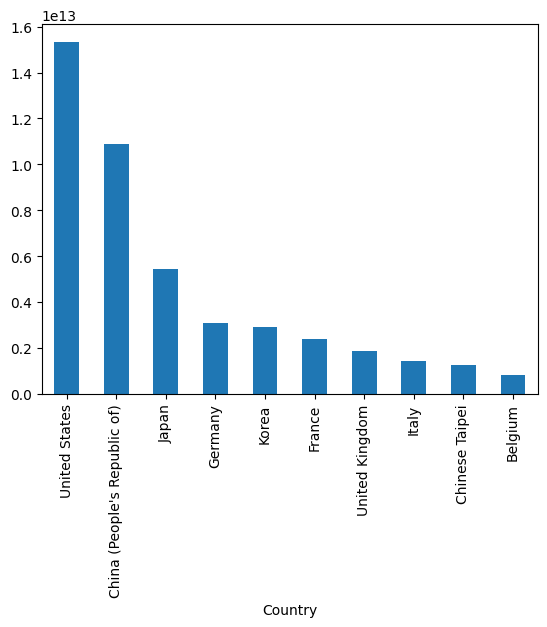

In [21]:
#plotting R&D expenditure per country, top ten 
df2.groupby('Country')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Industry'>

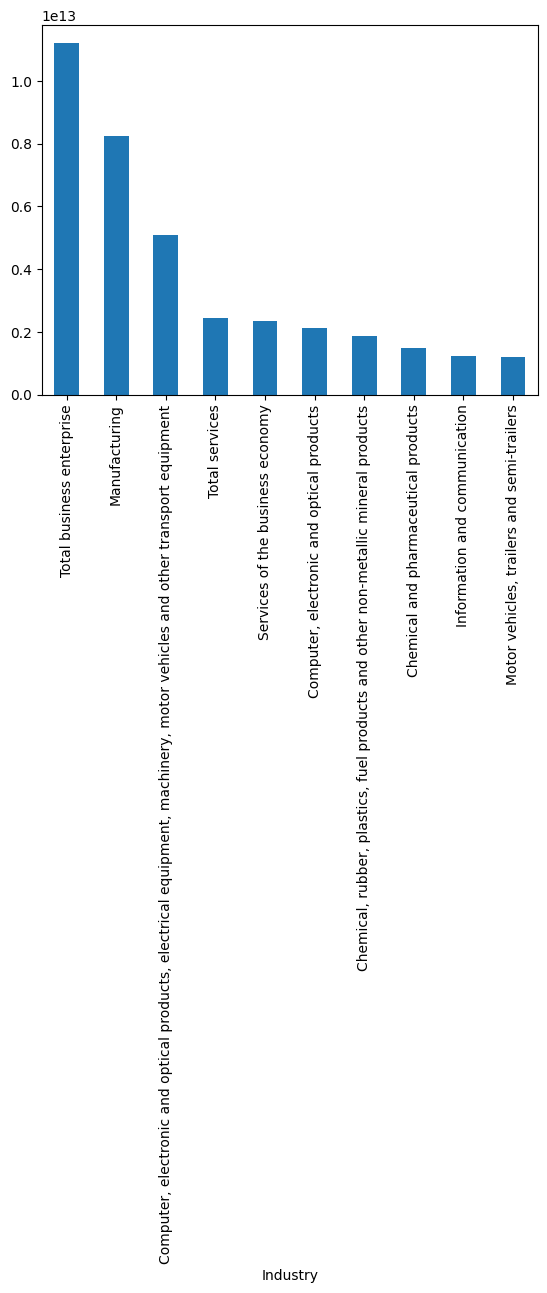

In [22]:
#plotting R&D expenditure per industry, top ten 
df2.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Time'>

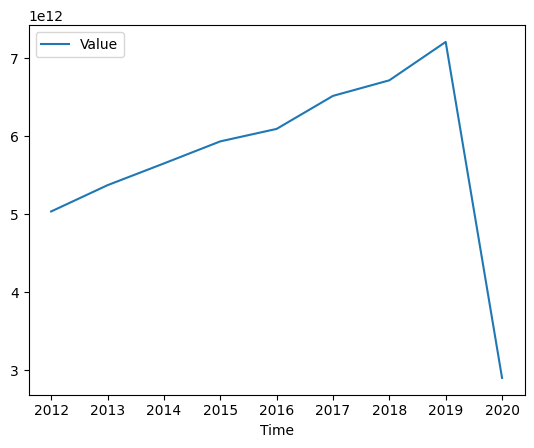

In [23]:
#plotting R&D expenditure over time 
df2_line = df2[["Time", "Value"]].groupby("Time").sum("Value")
df2_line.plot()

In [68]:
#filtering for top four countries
df3 = df2.loc[df2["Country"].isin(["Germany", "Japan", "China (People's Republic of)", "United States"])]


In [25]:
def exptrend(country:str, group:str, columnlist:list, sumby:str):
    df = df3[(df3.Country == country) ]
    df_line = df[columnlist].groupby(group).sum(sumby)
    df_line.plot(label = country)

Germany
Japan
United States
China (People's Republic of)


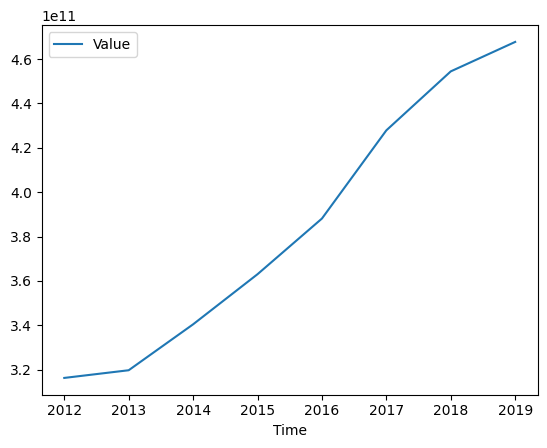

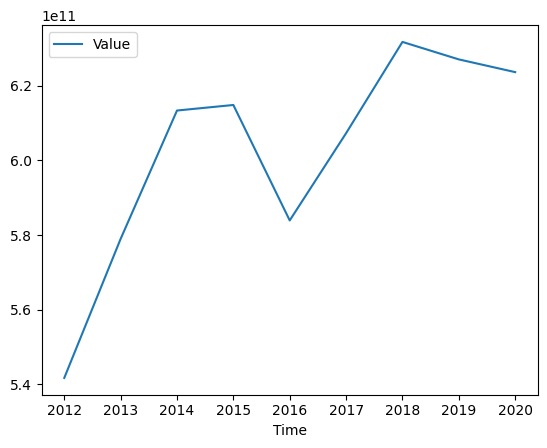

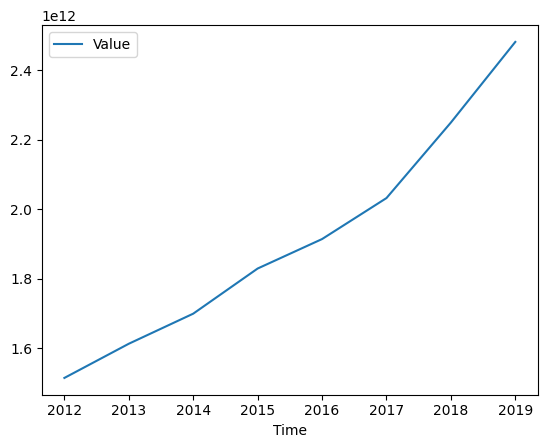

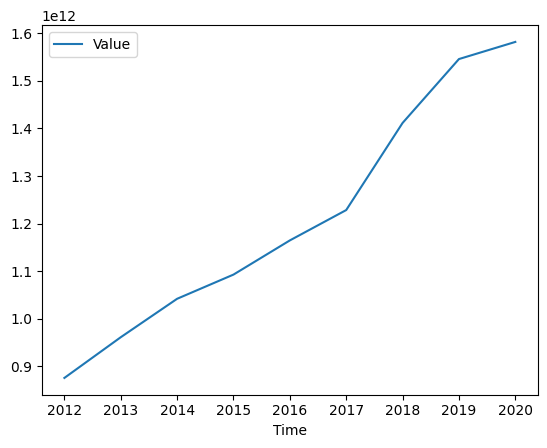

In [26]:
#line plot R&D expenditure for China, Germany, Japan, and US
for i in df3.Country.unique():
    exptrend(country=i, group="Time", columnlist=["Time","Value"], sumby="Value")
    print(i)

In [27]:
Ch = df3.loc[df3["Country"].isin(["China (People's Republic of)"])]
US = df3.loc[df3["Country"].isin(["United States"])]
Ge = df3.loc[df3["Country"].isin(["Germany"])]
Jap = df3.loc[df3["Country"].isin(["Japan"])]

In [28]:
#bar plot of R&D expenditure per Industry for US, Japan, Germany, China between 2012 and 2020

<AxesSubplot: xlabel='Industry'>

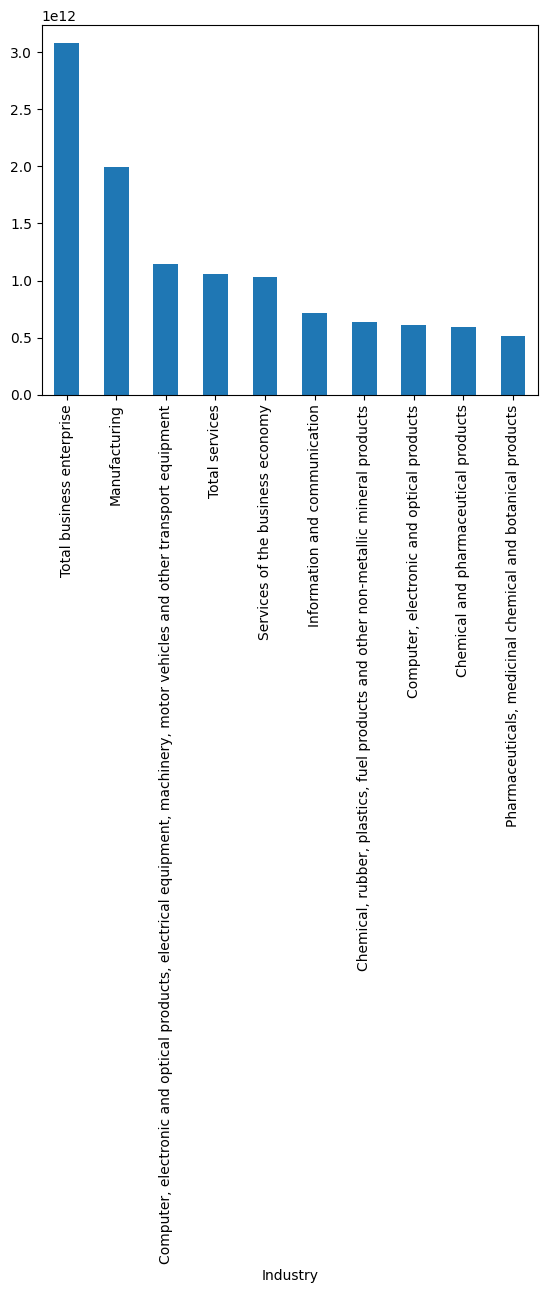

In [29]:
US.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Industry'>

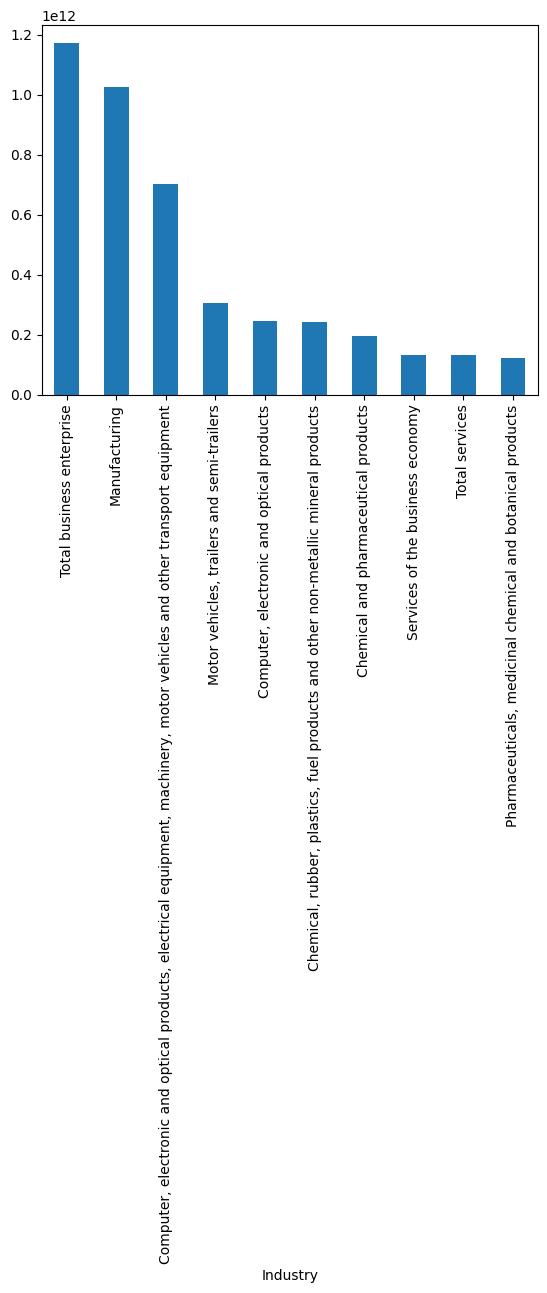

In [30]:
Jap.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Industry'>

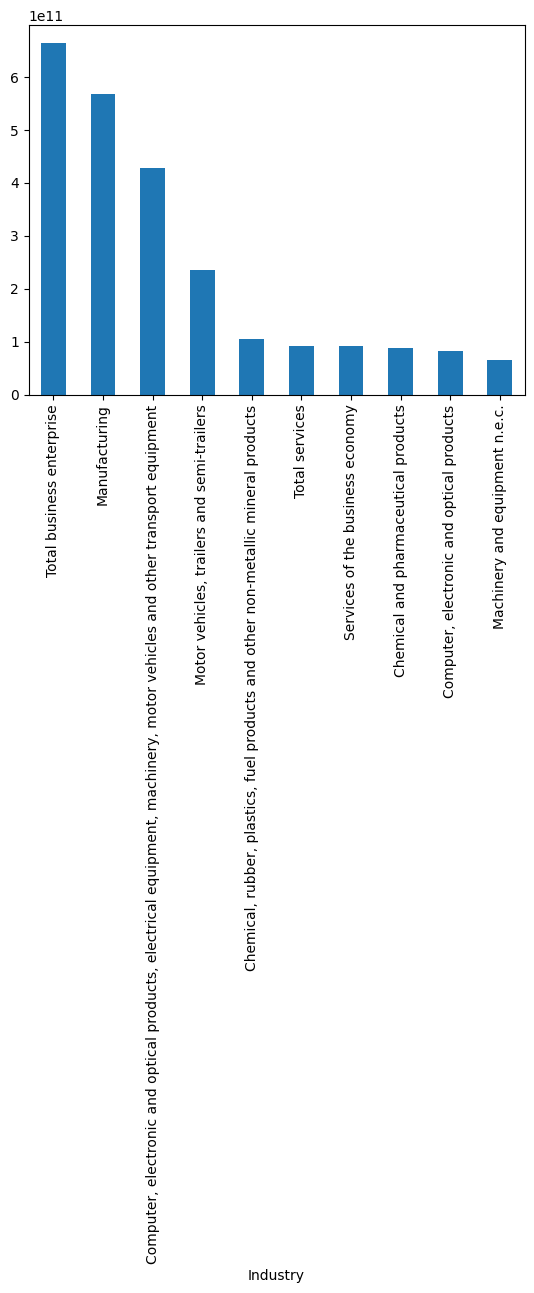

In [31]:
Ge.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

<AxesSubplot: xlabel='Industry'>

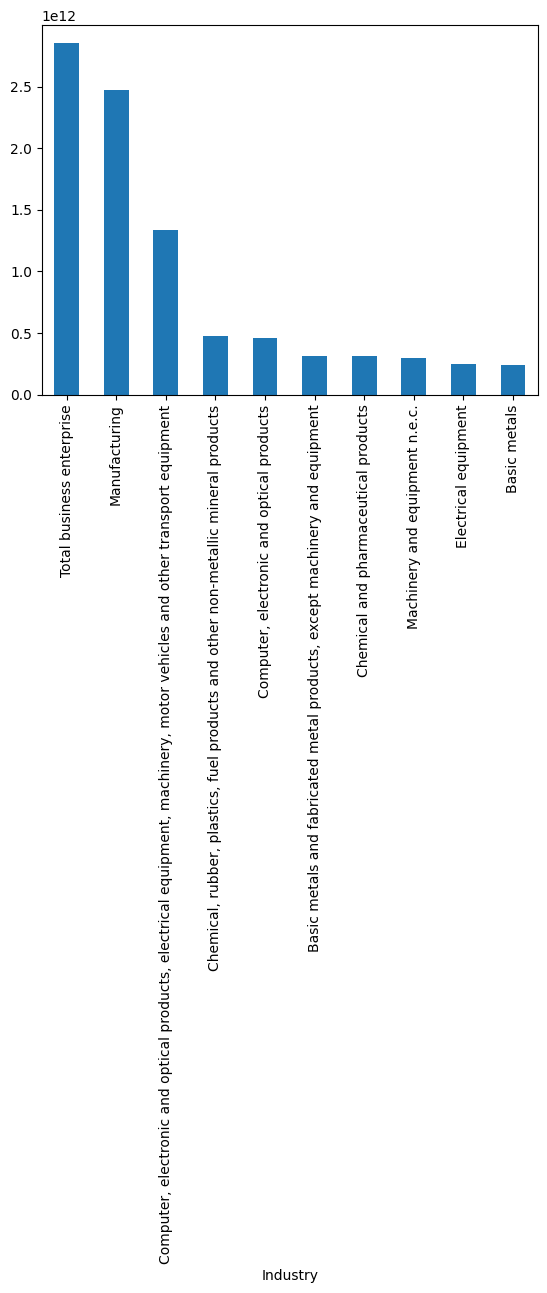

In [32]:
Ch.groupby('Industry')['Value'].sum().sort_values(ascending=0)[:10].plot.bar()

In [33]:
#boxplot of R&D expenditure per industry of China, Japan, Germany and US between 2012 and 2020 on a log scale

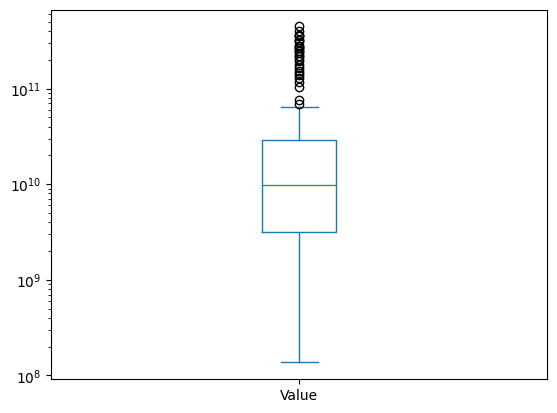

In [34]:
Ch['Value'].plot(kind='box')
plt.semilogy();

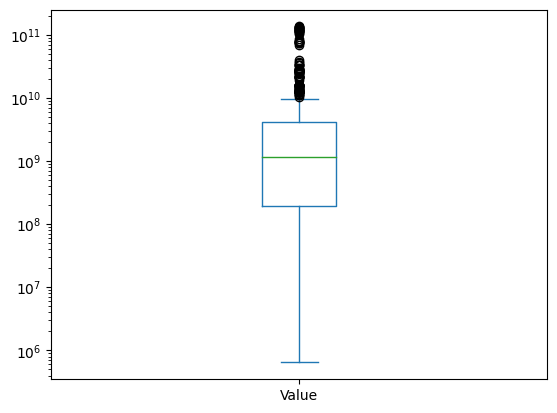

In [35]:
Jap['Value'].plot(kind='box')
plt.semilogy();

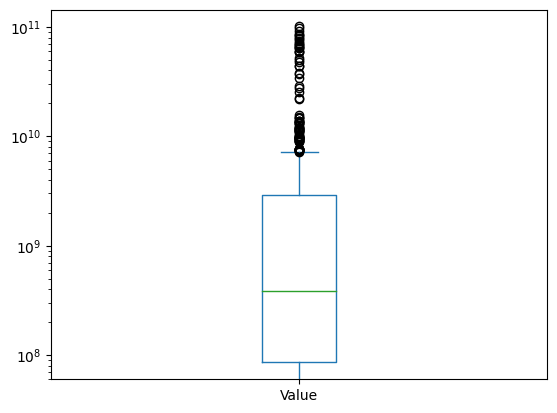

In [36]:
Ge['Value'].plot(kind='box')
plt.semilogy();

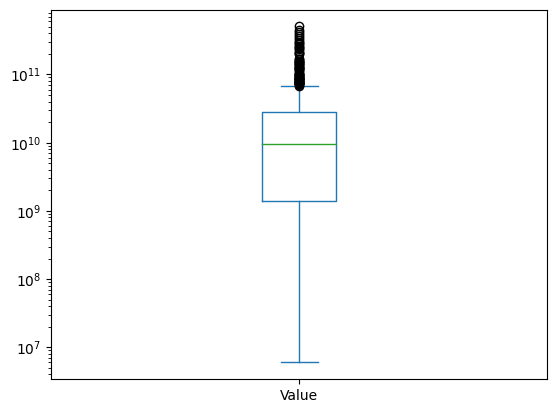

In [37]:
US['Value'].plot(kind='box')
plt.semilogy();

In [ ]:
#linear regression model for Germany

In [ ]:
#calculating annual R&D expenditure and then differences between years
Ge["R&D_Exp"] = Ge["Value"]
dfGEExp = Ge.groupby("Time").sum('Value').reset_index()
dfGEExp['DifExp'] = dfGEExp['R&D_Exp'].shift(1)

In [ ]:
#dropping GDP in 2020 and calculating differences between years
dfGEGDP = dfGDP6.loc[dfGDP6["Country"].isin(["Germany"])].reset_index()
dfGEGDP = dfGEGDP[:-1]
dfGEGDP['DifGDP'] = dfGEGDP['GDP'].shift(1)

In [220]:
#choosing same data type for merge column
dfGEGDP["Time"]=dfGEGDP["Time"].astype("int64")
dfGEExp["Time"]=dfGEExp["Time"].astype("int64")

In [222]:
#merging GDP and Exp data
mergedGEExpGDP = dfGEGDP.merge(dfGEExp, on="Time")

,index,Country,Country Code,Time,GDP,DifGDP,Value,R&D_Exp,DifExp
0,1,Germany,DEU,2012,43359.614827,NaN,316250097538,316250097538,NaN
1,5,Germany,DEU,2013,44993.892746,43359.614827,319710880791,319710880791,3.162501e+11
2,9,Germany,DEU,2014,47011.551094,44993.892746,340412555166,340412555166,3.197109e+11
3,13,Germany,DEU,2015,47609.781005,47011.551094,363004280897,363004280897,3.404126e+11
4,17,Germany,DEU,2016,50579.683930,47609.781005,388095161404,388095161404,3.630043e+11
5,21,Germany,DEU,2017,53071.455570,50579.683930,427859966212,427859966212,3.880952e+11
6,25,Germany,DEU,2018,55235.366305,53071.455570,454441656653,454441656653,4.278600e+11
7,29,Germany,DEU,2019,55652.887491,55235.366305,467721255578,467721255578,4.544417e+11


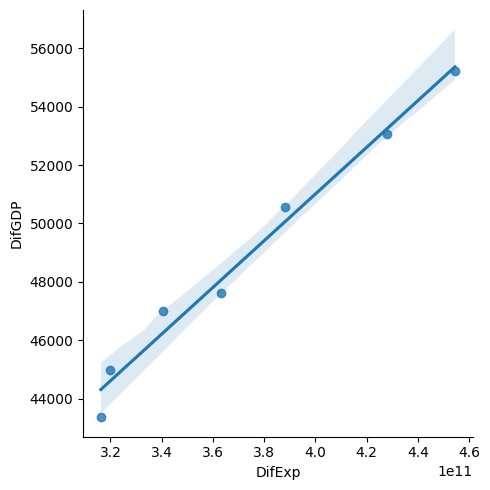

In [224]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedGEExpGDP)

In [202]:
indep = dfGEExp[["DifExp"]]
dep = dfGEGDP[[ "DifGDP"]]

In [205]:
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifGDP   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2192.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):                    6.36e-09
Time:                        17:35:59   Log-Likelihood:                         -64.867
No. Observations:                   7   AIC:                                      131.7
Df Residuals:                       6   BIC:                                      131.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      1.301e-07   2.78e-09     46.821      0.000    1.23e-07    1.37e-07
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.355
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.649
Skew:                          -0.446   Prob(JB):                        0.723
Kurtosis:                       1.804   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#linear regression for US

In [225]:
#calculating annual R&D expenditure and then differences between years
US["R&D_Exp"] = US["Value"]
dfUSExp = US.groupby("Time").sum('Value').reset_index()
dfUSExp['DifExp'] = dfUSExp['R&D_Exp'].shift(1)

In [236]:
#calculating differences between years, dropping 2020 bc no annual R&D
dfUSGDP = dfGDP6.loc[dfGDP6["Country"].isin(["United States"])].reset_index()
dfUSGDP = dfUSGDP[:-1]
dfUSGDP['DifGDP'] = dfUSGDP['GDP'].shift(1)

In [237]:
#choosing same data type for merge column
dfUSGDP["Time"]=dfUSGDP["Time"].astype("int64")
dfUSExp["Time"]=dfUSExp["Time"].astype("int64")

In [238]:
#merging GDP and Exp data
mergedUSExpGDP = dfUSGDP.merge(dfUSExp, on="Time")

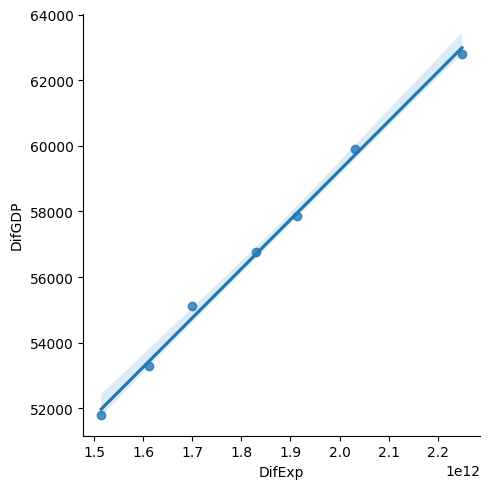

In [239]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedUSExpGDP)

In [242]:
indep = dfUSExp[["DifExp"]]
dep = dfUSGDP[[ "DifGDP"]]

In [243]:
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifGDP   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1390.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):                    2.48e-08
Time:                        18:18:47   Log-Likelihood:                         -67.502
No. Observations:                   7   AIC:                                      137.0
Df Residuals:                       6   BIC:                                      137.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      3.068e-08   8.23e-10     37.284      0.000    2.87e-08    3.27e-08
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.282
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.453
Skew:                          -0.440   Prob(JB):                        0.797
Kurtosis:                       2.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#linear regression for China

In [254]:
#calculating annual R&D expenditure and then differences between years
Ch["R&D_Exp"] = Ch["Value"]
dfChExp = Ch.groupby("Time").sum('Value').reset_index()
dfChExp['DifExp'] = dfChExp['R&D_Exp'].shift(1)

In [255]:
#calculating differences between years
dfChGDP = dfGDP6.loc[dfGDP6["Country"].isin(["China"])].reset_index()
dfChGDP['DifGDP'] = dfChGDP['GDP'].shift(1)

In [256]:
#choosing same data type for merge column
dfChGDP["Time"]=dfChGDP["Time"].astype("int64")
dfChExp["Time"]=dfChExp["Time"].astype("int64")

In [257]:
#merging GDP and Exp data
mergedChExpGDP = dfChGDP.merge(dfChExp, on="Time")

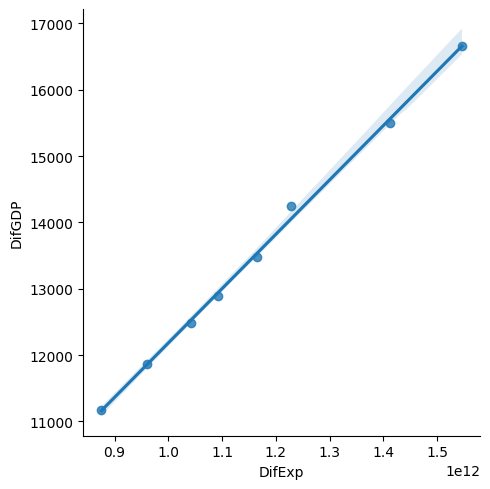

In [258]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedChExpGDP)

In [259]:
indep = dfChExp[["DifExp"]]
dep = dfChGDP[[ "DifGDP"]]

In [260]:
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifGDP   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2552.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):                    3.12e-10
Time:                        18:25:50   Log-Likelihood:                         -63.915
No. Observations:                   8   AIC:                                      129.8
Df Residuals:                       7   BIC:                                      129.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      1.151e-08   2.28e-10     50.520      0.000     1.1e-08     1.2e-08
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.568
Skew:                          -0.513   Prob(JB):                        0.753
Kurtosis:                       2.193   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#linear regression for Japan

In [261]:
#calculating annual R&D expenditure and then differences between years
Jap["R&D_Exp"] = Jap["Value"]
dfJapExp = Jap.groupby("Time").sum('Value').reset_index()
dfJapExp['DifExp'] = dfJapExp['R&D_Exp'].shift(1)

In [262]:
#calculating differences between years
dfJapGDP = dfGDP6.loc[dfGDP6["Country"].isin(["Japan"])].reset_index()
dfJapGDP['DifGDP'] = dfJapGDP['GDP'].shift(1)

In [263]:
#choosing same data type for merge column
dfJapGDP["Time"]=dfJapGDP["Time"].astype("int64")
dfJapExp["Time"]=dfJapExp["Time"].astype("int64")

In [264]:
#merging GDP and Exp data
mergedJapExpGDP = dfJapGDP.merge(dfJapExp, on="Time")

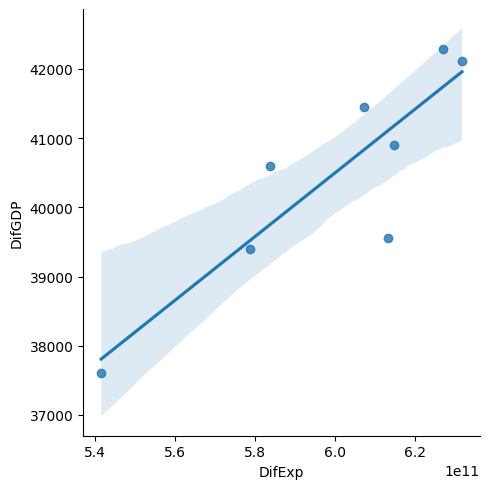

In [265]:
#line plot between Difference in GDP and R&D expenditure 
sns.lmplot(x="DifExp",y="DifGDP", data=mergedJapExpGDP)

In [266]:
indep = dfJapExp[["DifExp"]]
dep = dfJapGDP[[ "DifGDP"]]

In [267]:
#building linear regression model and dropping first row bc NA
X = indep.iloc[1:]
y = dep.iloc[1:]
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

C:\Users\lisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 DifGDP   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.340e+04
Date:                Sun, 12 Feb 2023   Prob (F-statistic):                    9.47e-13
Time:                        18:29:27   Log-Likelihood:                         -65.997
No. Observations:                   8   AIC:                                      134.0
Df Residuals:                       7   BIC:                                      134.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DifExp      6.745e-08   5.83e-10    115.745      0.000    6.61e-08    6.88e-08
==============================================================================
Omnibus:                        1.190   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.518
Skew:                          -0.582   Prob(JB):                        0.772
Kurtosis:                       2.556   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""